In [1]:
import numpy as np
import pandas as pd

# Object Creation
<hr>
<b>Creating a series object which is like list with index</b>

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

<hr>
    <b>Creating a DataFrame by passing a NumPy array, with a datetime index and labeled column</b>

In [4]:
dates = pd.date_range("20220226", periods=4)

In [5]:
dates

DatetimeIndex(['2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01'], dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(4,3),index=dates,columns=list("PQR"))

In [7]:
df

,P,Q,R
2022-02-26,0.615749,-0.488711,0.623589
2022-02-27,-0.925013,-0.910105,0.154193
2022-02-28,-1.313998,0.524335,0.518328
2022-03-01,0.846825,1.516712,-1.292570


<hr/>
<b>Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure</b>

In [8]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20220226"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["Hello", "world", "I'm", "palli"]),
        "F": "cp",
    }
)

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2022-02-26,1.0,3,Hello,cp
1,1.0,2022-02-26,1.0,3,world,cp
2,1.0,2022-02-26,1.0,3,I'm,cp
3,1.0,2022-02-26,1.0,3,palli,cp


<hr>
<b>The columns of the resulting DataFrame have different dtypes:</b>

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

<hr>
<b>Trying random public attribute using TAB</b>

In [11]:
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [12]:
df2.abs

<bound method NDFrame.abs of      A          B    C  D      E   F
0  1.0 2022-02-26  1.0  3  Hello  cp
1  1.0 2022-02-26  1.0  3  world  cp
2  1.0 2022-02-26  1.0  3    I'm  cp
3  1.0 2022-02-26  1.0  3  palli  cp>

In [13]:
df2.at_time

<bound method NDFrame.at_time of      A          B    C  D      E   F
0  1.0 2022-02-26  1.0  3  Hello  cp
1  1.0 2022-02-26  1.0  3  world  cp
2  1.0 2022-02-26  1.0  3    I'm  cp
3  1.0 2022-02-26  1.0  3  palli  cp>

# Viewing Data

In [14]:
df.head()

,P,Q,R
2022-02-26,0.615749,-0.488711,0.623589
2022-02-27,-0.925013,-0.910105,0.154193
2022-02-28,-1.313998,0.524335,0.518328
2022-03-01,0.846825,1.516712,-1.292570


In [15]:
df.tail(2)

,P,Q,R
2022-02-28,-1.313998,0.524335,0.518328
2022-03-01,0.846825,1.516712,-1.292570


In [16]:
df.index

DatetimeIndex(['2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01'], dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['P', 'Q', 'R'], dtype='object')

<hr><b>For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data:</b>

In [18]:
df.to_numpy()

array([[ 0.61574908, -0.48871137,  0.62358912],
       [-0.92501335, -0.91010517,  0.15419309],
       [-1.31399848,  0.52433535,  0.51832809],
       [ 0.84682478,  1.51671228, -1.29256985]])

In [19]:
df2.to_numpy()

array([[1.0, Timestamp('2022-02-26 00:00:00'), 1.0, 3, 'Hello', 'cp'],
       [1.0, Timestamp('2022-02-26 00:00:00'), 1.0, 3, 'world', 'cp'],
       [1.0, Timestamp('2022-02-26 00:00:00'), 1.0, 3, "I'm", 'cp'],
       [1.0, Timestamp('2022-02-26 00:00:00'), 1.0, 3, 'palli', 'cp']],
      dtype=object)

In [20]:
df.describe()

,P,Q,R
count,4.000000,4.000000,4.000000
mean,-0.194109,0.160558,0.000885
std,1.084403,1.086180,0.885445
min,-1.313998,-0.910105,-1.292570
25%,-1.022260,-0.594060,-0.207498
50%,-0.154632,0.017812,0.336261
75%,0.673518,0.772430,0.544643
max,0.846825,1.516712,0.623589


In [21]:
df.T

,2022-02-26,2022-02-27,2022-02-28,2022-03-01
P,0.615749,-0.925013,-1.313998,0.846825
Q,-0.488711,-0.910105,0.524335,1.516712
R,0.623589,0.154193,0.518328,-1.292570


In [22]:
df.sort_index(axis=0)

,P,Q,R
2022-02-26,0.615749,-0.488711,0.623589
2022-02-27,-0.925013,-0.910105,0.154193
2022-02-28,-1.313998,0.524335,0.518328
2022-03-01,0.846825,1.516712,-1.292570


In [23]:
df.sort_index(axis=1,ascending=False)

,R,Q,P
2022-02-26,0.623589,-0.488711,0.615749
2022-02-27,0.154193,-0.910105,-0.925013
2022-02-28,0.518328,0.524335,-1.313998
2022-03-01,-1.292570,1.516712,0.846825


In [24]:
df.sort_values(by="Q")

,P,Q,R
2022-02-27,-0.925013,-0.910105,0.154193
2022-02-26,0.615749,-0.488711,0.623589
2022-02-28,-1.313998,0.524335,0.518328
2022-03-01,0.846825,1.516712,-1.292570


# Selection

In [25]:
df["P"]

2022-02-26    0.615749
2022-02-27   -0.925013
2022-02-28   -1.313998
2022-03-01    0.846825
Freq: D, Name: P, dtype: float64

In [26]:
df[0:2]

,P,Q,R
2022-02-26,0.615749,-0.488711,0.623589
2022-02-27,-0.925013,-0.910105,0.154193


In [27]:
df["20220227":"20220301"]

,P,Q,R
2022-02-27,-0.925013,-0.910105,0.154193
2022-02-28,-1.313998,0.524335,0.518328
2022-03-01,0.846825,1.516712,-1.292570


In [28]:
df.loc[dates[0]]

P    0.615749
Q   -0.488711
R    0.623589
Name: 2022-02-26 00:00:00, dtype: float64

In [29]:
df.loc[:,["P","Q"]]

,P,Q
2022-02-26,0.615749,-0.488711
2022-02-27,-0.925013,-0.910105
2022-02-28,-1.313998,0.524335
2022-03-01,0.846825,1.516712


In [30]:
df.loc["20220228",["Q","R"]]

Q    0.524335
R    0.518328
Name: 2022-02-28 00:00:00, dtype: float64

In [31]:
df.loc[dates[0],"P"]

0.615749075090467

In [32]:
df.at[dates[0],"P"]

0.615749075090467

In [33]:
df.iloc[2]

P   -1.313998
Q    0.524335
R    0.518328
Name: 2022-02-28 00:00:00, dtype: float64

In [34]:
df.iloc[0:1,1:2]

,Q
2022-02-26,-0.488711


In [35]:
df.iloc[[0,2],[1]]

,Q
2022-02-26,-0.488711
2022-02-28,0.524335


In [36]:
df.iloc[1:2,:]

,P,Q,R
2022-02-27,-0.925013,-0.910105,0.154193


In [37]:
df.iloc[:,0:2]

,P,Q
2022-02-26,0.615749,-0.488711
2022-02-27,-0.925013,-0.910105
2022-02-28,-1.313998,0.524335
2022-03-01,0.846825,1.516712


In [38]:
df.iloc[2,2]

0.5183280949434939

In [39]:
df.iat[2,2]

0.5183280949434939

In [40]:
df[df["P"]>0]

,P,Q,R
2022-02-26,0.615749,-0.488711,0.623589
2022-03-01,0.846825,1.516712,-1.292570


In [41]:
df[df>0]

,P,Q,R
2022-02-26,0.615749,NaN,0.623589
2022-02-27,NaN,NaN,0.154193
2022-02-28,NaN,0.524335,0.518328
2022-03-01,0.846825,1.516712,NaN


In [42]:
df3 = df.copy()

In [43]:
df3

,P,Q,R
2022-02-26,0.615749,-0.488711,0.623589
2022-02-27,-0.925013,-0.910105,0.154193
2022-02-28,-1.313998,0.524335,0.518328
2022-03-01,0.846825,1.516712,-1.292570


In [44]:
df3["Q"] = ["one", "two", "three", "four"]

In [45]:
df3

,P,Q,R
2022-02-26,0.615749,one,0.623589
2022-02-27,-0.925013,two,0.154193
2022-02-28,-1.313998,three,0.518328
2022-03-01,0.846825,four,-1.292570


In [46]:
df3[df3["Q"].isin(["two", "four"])]

,P,Q,R
2022-02-27,-0.925013,two,0.154193
2022-03-01,0.846825,four,-1.292570


In [47]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20220226", periods=6))

In [48]:
s1

2022-02-26    1
2022-02-27    2
2022-02-28    3
2022-03-01    4
2022-03-02    5
2022-03-03    6
Freq: D, dtype: int64

In [49]:
df["F"] = s1

In [50]:
df.at[dates[0], "P"] = 0

In [51]:
df

,P,Q,R,F
2022-02-26,0.000000,-0.488711,0.623589,1
2022-02-27,-0.925013,-0.910105,0.154193,2
2022-02-28,-1.313998,0.524335,0.518328,3
2022-03-01,0.846825,1.516712,-1.292570,4


In [52]:
df.iat[0, 1] = 0

In [53]:
df

,P,Q,R,F
2022-02-26,0.000000,0.000000,0.623589,1
2022-02-27,-0.925013,-0.910105,0.154193,2
2022-02-28,-1.313998,0.524335,0.518328,3
2022-03-01,0.846825,1.516712,-1.292570,4


In [54]:
df.loc[:, "R"] = np.array([5] * len(df))

In [55]:
df

,P,Q,R,F
2022-02-26,0.000000,0.000000,5,1
2022-02-27,-0.925013,-0.910105,5,2
2022-02-28,-1.313998,0.524335,5,3
2022-03-01,0.846825,1.516712,5,4


In [56]:
df4 = df.copy()

In [57]:
df4[df4>0] = -df4

In [58]:
df4

,P,Q,R,F
2022-02-26,0.000000,0.000000,-5,-1
2022-02-27,-0.925013,-0.910105,-5,-2
2022-02-28,-1.313998,-0.524335,-5,-3
2022-03-01,-0.846825,-1.516712,-5,-4


In [59]:
df

,P,Q,R,F
2022-02-26,0.000000,0.000000,5,1
2022-02-27,-0.925013,-0.910105,5,2
2022-02-28,-1.313998,0.524335,5,3
2022-03-01,0.846825,1.516712,5,4


# Missing Data

In [60]:
df1 = df.reindex(index=dates[0:3],columns = list(df.columns)+["E"])

In [61]:
df1.loc[dates[0]:dates[1],"E"] = 1

In [62]:
df1

,P,Q,R,F,E
2022-02-26,0.000000,0.000000,5,1,1.0
2022-02-27,-0.925013,-0.910105,5,2,1.0
2022-02-28,-1.313998,0.524335,5,3,NaN


In [63]:
df1.dropna(how="any")

,P,Q,R,F,E
2022-02-26,0.000000,0.000000,5,1,1.0
2022-02-27,-0.925013,-0.910105,5,2,1.0


In [64]:
df1.fillna(value=5)

,P,Q,R,F,E
2022-02-26,0.000000,0.000000,5,1,1.0
2022-02-27,-0.925013,-0.910105,5,2,1.0
2022-02-28,-1.313998,0.524335,5,3,5.0


In [65]:
pd.isna(df1)

,P,Q,R,F,E
2022-02-26,False,False,False,False,False
2022-02-27,False,False,False,False,False
2022-02-28,False,False,False,False,True


# Operations

In [66]:
df.mean()

P   -0.348047
Q    0.282736
R    5.000000
F    2.500000
dtype: float64

In [67]:
df.mean(1)

2022-02-26    1.500000
2022-02-27    1.291220
2022-02-28    1.802584
2022-03-01    2.840884
Freq: D, dtype: float64

In [70]:
s = pd.Series([1, 3, np.nan,4], index=dates).shift(2)

In [71]:
s

2022-02-26    NaN
2022-02-27    NaN
2022-02-28    1.0
2022-03-01    3.0
Freq: D, dtype: float64

In [72]:
df.sub(s,axis="index")

,P,Q,R,F
2022-02-26,NaN,NaN,NaN,NaN
2022-02-27,NaN,NaN,NaN,NaN
2022-02-28,-2.313998,-0.475665,4.0,2.0
2022-03-01,-2.153175,-1.483288,2.0,1.0


In [73]:
df.apply(np.cumsum)

,P,Q,R,F
2022-02-26,0.000000,0.000000,5,1
2022-02-27,-0.925013,-0.910105,10,3
2022-02-28,-2.239012,-0.385770,15,6
2022-03-01,-1.392187,1.130942,20,10


In [74]:
df.apply(lambda x: x.max() - x.min())

P    2.160823
Q    2.426817
R    0.000000
F    3.000000
dtype: float64

In [75]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [76]:
s

0    2
1    4
2    3
3    6
4    6
5    3
6    1
7    4
8    0
9    2
dtype: int32

In [77]:
s.value_counts()

2    2
4    2
3    2
6    2
1    1
0    1
dtype: int64

In [78]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [79]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

In [80]:
df = pd.DataFrame(np.random.randn(10,4))

In [81]:
df

,0,1,2,3
0,-1.173193,-0.995036,-1.324909,1.549450
1,-1.084984,-1.479279,-0.316296,1.033469
2,1.254148,-0.669552,0.806640,-0.055386
3,0.142357,-0.746610,-0.954237,2.035502
4,-0.263602,-0.607542,-0.249654,0.616955
5,-0.214384,0.575930,-0.712820,-0.627747
6,1.375717,1.382691,0.800896,0.335585
7,-0.002273,-0.116405,2.214532,0.308842
8,-2.145909,-0.575736,0.725070,-1.455281
9,0.051192,-0.880631,-2.818730,0.756752


In [83]:
pieces = [df[:3],df[3:7],df[7:]]

In [84]:
pd.concat(pieces)

,0,1,2,3
0,-1.173193,-0.995036,-1.324909,1.549450
1,-1.084984,-1.479279,-0.316296,1.033469
2,1.254148,-0.669552,0.806640,-0.055386
3,0.142357,-0.746610,-0.954237,2.035502
4,-0.263602,-0.607542,-0.249654,0.616955
5,-0.214384,0.575930,-0.712820,-0.627747
6,1.375717,1.382691,0.800896,0.335585
7,-0.002273,-0.116405,2.214532,0.308842
8,-2.145909,-0.575736,0.725070,-1.455281
9,0.051192,-0.880631,-2.818730,0.756752


In [85]:
left = pd.DataFrame({"key": ["hello", "hello"], "lval": [1, 2]})

In [90]:
right = pd.DataFrame({"key": ["hello", "hello"], "rval": [4, 5]})

In [91]:
left

,key,lval
0,hello,1
1,hello,2


In [92]:
right

,key,rval
0,hello,4
1,hello,5


In [93]:
pd.merge(left,right, on="key")

,key,lval,rval
0,hello,1,4
1,hello,1,5
2,hello,2,4
3,hello,2,5


In [94]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [95]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [96]:
left

,key,lval
0,foo,1
1,bar,2


In [97]:
right

,key,rval
0,foo,4
1,bar,5


In [98]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

In [99]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [100]:
df

,A,B,C,D
0,foo,one,0.710033,1.577716
1,bar,one,0.211215,1.723021
2,foo,two,0.975580,0.229823
3,bar,three,1.608705,0.405446
4,foo,two,1.001449,-0.151992
5,bar,two,-1.290353,-0.161462
6,foo,one,0.249019,-0.335163
7,foo,three,0.626774,-0.007514


In [101]:
df.groupby("A").sum()

,C,D
A,,
bar,0.529568,1.967005
foo,3.562854,1.312870


In [102]:
df.groupby(["C","D"]).sum()

,,A,B
C,D,,
-1.290353,-0.161462,bar,two
0.211215,1.723021,bar,one
0.249019,-0.335163,foo,one
0.626774,-0.007514,foo,three
0.710033,1.577716,foo,one
0.975580,0.229823,foo,two
1.001449,-0.151992,foo,two
1.608705,0.405446,bar,three


# Reshaping

In [103]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

In [104]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [105]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [106]:
df2 = df[:4]

In [107]:
df2

A         B
first second                    
bar   one    -0.744326  0.173926
      two    -0.772589 -0.886754
baz   one    -1.281297  1.894152
      two    -1.912549 -0.229303

In [108]:
stacked = df2.stack()

In [109]:
stacked

first  second   
bar    one     A   -0.744326
               B    0.173926
       two     A   -0.772589
               B   -0.886754
baz    one     A   -1.281297
               B    1.894152
       two     A   -1.912549
               B   -0.229303
dtype: float64

In [110]:
stacked.unstack()

A         B
first second                    
bar   one    -0.744326  0.173926
      two    -0.772589 -0.886754
baz   one    -1.281297  1.894152
      two    -1.912549 -0.229303

In [111]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.744326 -0.772589
      B  0.173926 -0.886754
baz   A -1.281297 -1.912549
      B  1.894152 -0.229303

In [112]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.744326 -1.281297
       B  0.173926  1.894152
two    A -0.772589 -1.912549
       B -0.886754 -0.229303

In [113]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [114]:
df

,A,B,C,D,E
0,one,A,foo,0.080662,0.657004
1,one,B,foo,0.244130,0.790054
2,two,C,foo,-1.643694,-0.664220
3,three,A,bar,1.668679,0.146200
4,one,B,bar,-1.509457,-0.776849
5,one,C,bar,-0.918832,1.100232
6,two,A,foo,-0.997080,0.404038
7,three,B,foo,-0.254558,0.978362
8,one,C,foo,-0.413211,-0.063368
9,one,A,bar,0.346221,-0.083798


In [115]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.346221  0.080662
      B -1.509457  0.244130
      C -0.918832 -0.413211
three A  1.668679       NaN
      B       NaN -0.254558
      C  0.728039       NaN
two   A       NaN -0.997080
      B  1.010890       NaN
      C       NaN -1.643694

# Time Series

In [116]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [117]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [118]:
ts.resample("5Min").sum()

2012-01-01    25856
Freq: 5T, dtype: int32

In [119]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [120]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [121]:
ts

2012-03-06    0.144964
2012-03-07    0.064208
2012-03-08    2.230102
2012-03-09   -0.801784
2012-03-10    1.198798
Freq: D, dtype: float64

In [122]:
ts_utc = ts.tz_localize("UTC")

In [123]:
ts_utc

2012-03-06 00:00:00+00:00    0.144964
2012-03-07 00:00:00+00:00    0.064208
2012-03-08 00:00:00+00:00    2.230102
2012-03-09 00:00:00+00:00   -0.801784
2012-03-10 00:00:00+00:00    1.198798
Freq: D, dtype: float64

In [124]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.144964
2012-03-06 19:00:00-05:00    0.064208
2012-03-07 19:00:00-05:00    2.230102
2012-03-08 19:00:00-05:00   -0.801784
2012-03-09 19:00:00-05:00    1.198798
Freq: D, dtype: float64

In [125]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [127]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [128]:
ts

2012-01-31   -0.245115
2012-02-29   -0.471034
2012-03-31   -0.542642
2012-04-30   -0.958819
2012-05-31    0.427373
Freq: M, dtype: float64

In [129]:
ps = ts.to_period()

In [130]:
ps

2012-01   -0.245115
2012-02   -0.471034
2012-03   -0.542642
2012-04   -0.958819
2012-05    0.427373
Freq: M, dtype: float64

In [131]:
ps.to_timestamp()

2012-01-01   -0.245115
2012-02-01   -0.471034
2012-03-01   -0.542642
2012-04-01   -0.958819
2012-05-01    0.427373
Freq: MS, dtype: float64

In [132]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [133]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [134]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9


In [135]:
ts.head()

1990-03-01 09:00   -0.250912
1990-06-01 09:00    0.205966
1990-09-01 09:00   -1.645463
1990-12-01 09:00    0.319282
1991-03-01 09:00    0.573742
Freq: H, dtype: float64

# Categoricals

In [136]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [137]:
df["grade"] = df["raw_grade"].astype("category")

In [138]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [139]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [140]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [141]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [142]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [143]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [144]:
import matplotlib.pyplot as plt

In [145]:
plt.close("all")

In [146]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [147]:
ts = ts.cumsum()

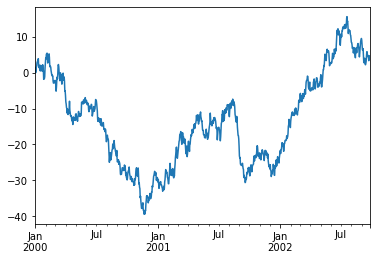

In [148]:
ts.plot();

In [149]:
plt.show();

In [150]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [151]:
df = df.cumsum()

In [152]:
plt.figure();

<Figure size 432x288 with 0 Axes>

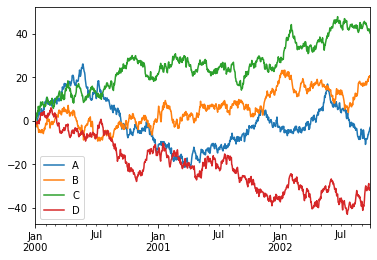

In [156]:
df.plot();

# Getting data in/out

In [161]:
df.to_csv("Demo.csv")

In [162]:
pd.read_csv("Demo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.041079,-0.020900,0.402399,0.313403
1,2000-01-02,-1.113066,-0.490253,0.098242,-1.267395
2,2000-01-03,-2.778711,-0.427231,0.675500,-0.853979
3,2000-01-04,-2.150669,-1.528980,1.481941,-1.483239
4,2000-01-05,-1.540713,-1.066089,1.829007,-0.973921
...,...,...,...,...,...
995,2002-09-22,-5.152029,20.326794,41.338606,-28.830447
996,2002-09-23,-5.076853,19.939082,42.201182,-31.654981
997,2002-09-24,-4.484376,20.121528,41.644392,-31.909658
998,2002-09-25,-3.401089,20.734205,40.598254,-31.039210


In [163]:
df.to_hdf("foo.h5", "df")

In [164]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-2.041079,-0.020900,0.402399,0.313403
2000-01-02,-1.113066,-0.490253,0.098242,-1.267395
2000-01-03,-2.778711,-0.427231,0.675500,-0.853979
2000-01-04,-2.150669,-1.528980,1.481941,-1.483239
2000-01-05,-1.540713,-1.066089,1.829007,-0.973921
...,...,...,...,...
2002-09-22,-5.152029,20.326794,41.338606,-28.830447
2002-09-23,-5.076853,19.939082,42.201182,-31.654981
2002-09-24,-4.484376,20.121528,41.644392,-31.909658
2002-09-25,-3.401089,20.734205,40.598254,-31.039210


In [165]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [166]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.041079,-0.020900,0.402399,0.313403
1,2000-01-02,-1.113066,-0.490253,0.098242,-1.267395
2,2000-01-03,-2.778711,-0.427231,0.675500,-0.853979
3,2000-01-04,-2.150669,-1.528980,1.481941,-1.483239
4,2000-01-05,-1.540713,-1.066089,1.829007,-0.973921
...,...,...,...,...,...
995,2002-09-22,-5.152029,20.326794,41.338606,-28.830447
996,2002-09-23,-5.076853,19.939082,42.201182,-31.654981
997,2002-09-24,-4.484376,20.121528,41.644392,-31.909658
998,2002-09-25,-3.401089,20.734205,40.598254,-31.039210


In [167]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().